# Time to get your hands dirty! Position of a quasar

You measure the position of a quasar $N$ times with the *same* telescope, i.e., errors are homoscedastic. Let's say the underlying process is Gaussian, the true position is $\mu = 1$ (in suitable units), and the errors are $\sigma = 0.2$.

## Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point:

  $$ p(x_i | \mu, \sigma) $$

- Plot each of the individual likelihoods separately. Also plot their product (i.e., the likelihood of the dataset $\{ x_i \}$). Make sure the x-grid has enough points.
- Just read off the maximum likelihood solution (e.g., using `np.argsort`).
- Compare it with the MLE estimator derived above.

## Part 2

Check the Fisher matrix error estimate makes sense:

- Do a rough second-order differentiation of our log-likelihood function with `np.diff`,
- Divide by our $\Delta \theta^2$ to get the correct normalization,
- Multiply by $-1$,
- Then take the square root:

  $$ \sigma = \sqrt{-\frac{d^2 \log L}{d\theta^2}} $$

- Compare with the Fisher matrix error derived above.
- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution.  
  *(The normalization won't be captured; you can rescale it as you like to check that it agrees.)*

## Part 3 (optional)

Let's make our model more realistic. Our $N$ measurements were taken on different nights, where the sky behaved differently (i.e., errors are heteroscedastic). Let's assume that each measurement has a $\sigma_i$ that is normally distributed with:

- Mean: **0.2**
- Standard deviation: **0.05**










In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from scipy.stats import norm
import math

(array([1., 0., 0., 0., 0., 0., 0., 3., 0., 1., 1., 0., 2., 2., 1., 2., 2.,
        2., 0., 2., 1., 3., 3., 6., 6., 4., 6., 3., 2., 2., 5., 4., 6., 5.,
        1., 2., 2., 2., 3., 2., 4., 1., 0., 0., 1., 2., 4., 0., 0., 1.]),
 array([-0.30987255, -0.26515232, -0.22043209, -0.17571185, -0.13099162,
        -0.08627139, -0.04155115,  0.00316908,  0.04788931,  0.09260954,
         0.13732978,  0.18205001,  0.22677024,  0.27149048,  0.31621071,
         0.36093094,  0.40565117,  0.45037141,  0.49509164,  0.53981187,
         0.58453211,  0.62925234,  0.67397257,  0.7186928 ,  0.76341304,
         0.80813327,  0.8528535 ,  0.89757374,  0.94229397,  0.9870142 ,
         1.03173443,  1.07645467,  1.1211749 ,  1.16589513,  1.21061537,
         1.2553356 ,  1.30005583,  1.34477606,  1.3894963 ,  1.43421653,
         1.47893676,  1.523657  ,  1.56837723,  1.61309746,  1.65781769,
         1.70253793,  1.74725816,  1.79197839,  1.83669863,  1.88141886,
         1.92613909]),
 <BarContainer object

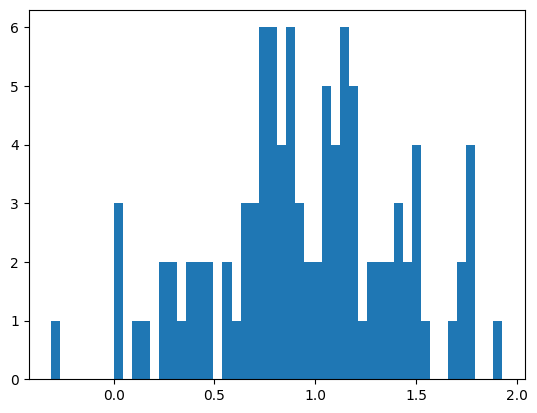

In [6]:
N=100
mu_true=1 #True position
sigma_true=0.2 #Homoscedastic error
sigma_gen=0.5 #Measurement error
np.random.seed(42)
xi= np.random.normal(mu_true,sigma_gen,N) 
plt.hist(xi, bins=50)

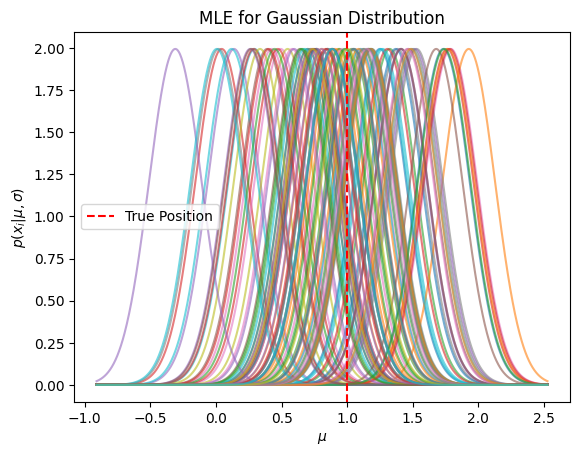

In [7]:
value=np.linspace(min(xi)-3*sigma_true,max(xi)+3*sigma_true, 1000)
for i in range(N):
    gauss=norm.pdf(value, xi[i], sigma_true) #Drawing of Gaussians centred on each measurement
    plt.plot(value, gauss, alpha=0.6)

plt.axvline(mu_true, color="red", linestyle="--", label="True Position")
plt.legend()
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution');


    

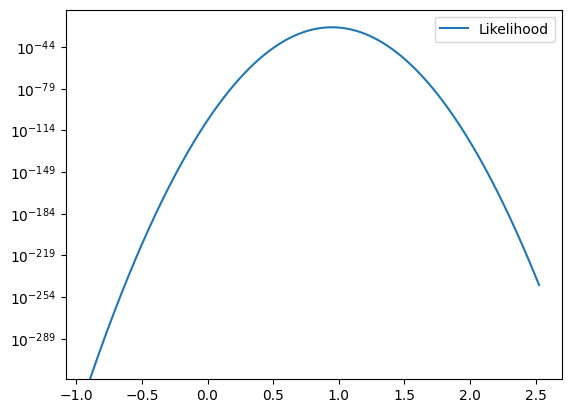

In [8]:
likelihood=[]
for i in range(len(value)):
    l=1
    for j in range (N):
        l *= norm.pdf(value[i] ,xi[j], sigma_gen) 
    likelihood.append(l)

plt.plot(value, likelihood, label="Likelihood")
plt.yscale('log')
plt.legend()

/tmp/ipykernel_16161/616198492.py:2: RuntimeWarning: divide by zero encountered in log
  log_likelihood=np.log(likelihood)


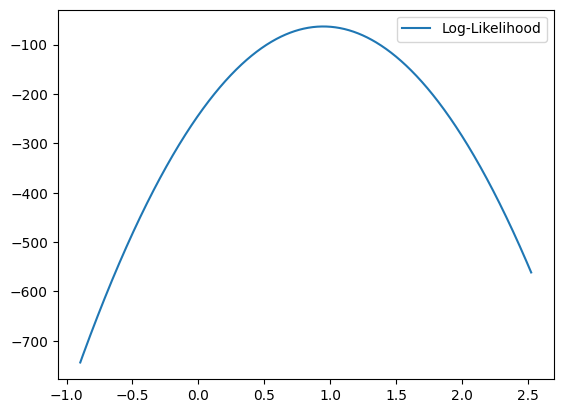

In [9]:
likelihood=np.array(likelihood)
log_likelihood=np.log(likelihood)
plt.plot(value, log_likelihood, label="Log-Likelihood")
plt.legend()


In [10]:
max_value = value[np.argmax(likelihood)]
print("The maximum of the likelihood is", max_value)
mu_estimator=np.mean(xi)
print("The MLE estimator for μ is", mu_estimator)
err_max=np.abs(max_value-mu_true)/mu_true
err_est=np.abs(mu_estimator-mu_true)/mu_true
print("The relativ error on the maximum of the likelihood is", err_max)
print("The relativ error on the MLE estimator is", err_est)



The maximum of the likelihood is 0.9474310394682854
The MLE estimator for μ is 0.9480767413029529
The relativ error on the maximum of the likelihood is 0.05256896053171456
The relativ error on the MLE estimator is 0.05192325869704706


In [11]:
derivate=np.diff(log_likelihood,2)
dteta=value[1]-value[0]
f=-1*derivate/(dteta**2)
mfischer_n=f[np.argmax(likelihood)-2]
sigmamu_n=np.sqrt(1/mfischer_n)
print("The expected numerical error of μ is ", sigmamu_n)

matrixf_mu=-N/sigma_gen**2
sigmamu=np.sqrt(-1/matrixf_mu)
print("The expected error of μ is ", sigmamu)



The expected numerical error of μ is  0.05000000000002335
The expected error of μ is  0.05


/home/sara/myenv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


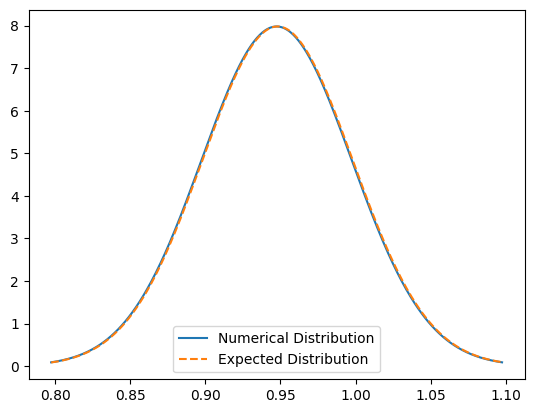

In [14]:
x=np.linspace(max_value-3*sigmamu_n,max_value+3*sigmamu_n, 500)
gauss_n=norm.pdf(x,max_value,sigmamu_n)
gauss=norm.pdf(x,mu_estimator,sigmamu)
plt.plot(x,gauss_n,label="Numerical Distribution", ls='-')
plt.plot(x,gauss, label="Expected Distribution", ls='dashed')
plt.legend()


Generalize the code for heteoscedastic measuraments

In [ ]:
N=100
mu_true=1
sigma_true=0.2
sigma_gen=0.5 #Measurement error
mu_s=0.2
sigma_s=0.05
np.random.seed(42)
sigmai=np.random.normal(mu_s, sigma_s,N)
x= [] 
for s in sigmai:
    sample = norm(mu_true, s).rvs(1)  
    x.append(sample) 

xi= np.concatenate(x)


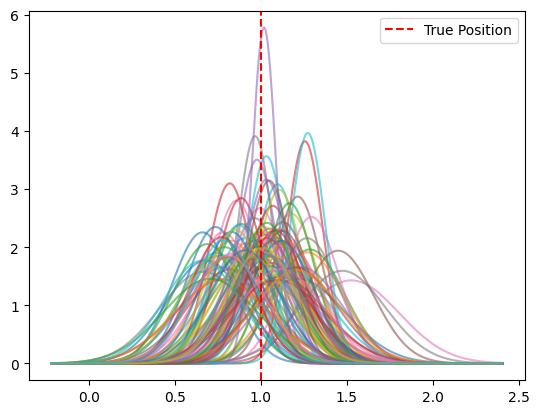

In [16]:
value=np.linspace(min(xi)-3*max(sigmai),max(xi)+3*max(sigmai), 1000)
for i in range(N):
    gauss=norm.pdf(value, xi[i], sigmai[i]) #Drawing of Gaussians centred on each measurement
    plt.plot(value, gauss, alpha=0.6)

plt.axvline(mu_true, color="red", linestyle="--", label="True Position")
plt.legend()


/tmp/ipykernel_16161/3904258403.py:9: RuntimeWarning: divide by zero encountered in log
  log_likelihood=np.log(likelihood)


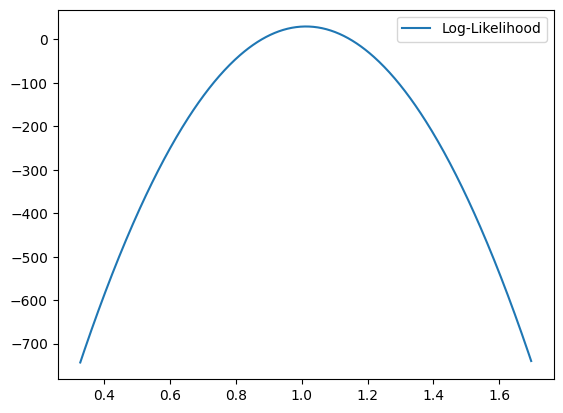

In [17]:
likelihood=[]
for i in range(len(value)):
    l=1
    for j in range (N):
        l *= norm.pdf(value[i] ,xi[j], sigmai[j]) 
    likelihood.append(l)

likelihood=np.array(likelihood)
log_likelihood=np.log(likelihood)
plt.plot(value, log_likelihood, label="Log-Likelihood")
plt.legend()

In [18]:
max_value = value[np.argmax(likelihood)]
print("The maximum of the likelihood is", max_value)
num=np.sum(xi/(sigmai**2))
den=np.sum(1/(sigmai**2))
mu_estimator=num/den
print("The MLE estimator for μ is", mu_estimator)

err_max=np.abs(max_value-mu_true)/mu_true
err_est=np.abs(mu_estimator-mu_true)/mu_true
print("The relativ error on the maximum of the likelihood is", err_max)
print("The relativ error on the MLE estimator is", err_est)


The maximum of the likelihood is 1.012060075942049
The MLE estimator for μ is 1.0127840218270174
The relativ error on the maximum of the likelihood is 0.012060075942049053
The relativ error on the MLE estimator is 0.012784021827017433


In [19]:
derivate=np.diff(log_likelihood,2)
dteta=value[1]-value[0]
f=-1*derivate/(dteta**2)
mfischer_n=f[np.argmax(likelihood)-2]
sigmamu_n=np.sqrt(1/mfischer_n)
print("The expected numerical error of μ is ", sigmamu_n)

matrixf_mu=den
sigmamu=np.sqrt(1/matrixf_mu)
print("The expected error of μ is ", sigmamu)


The expected numerical error of μ is  0.01744979040243027
The expected error of μ is  0.01744979040242859


/home/sara/myenv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


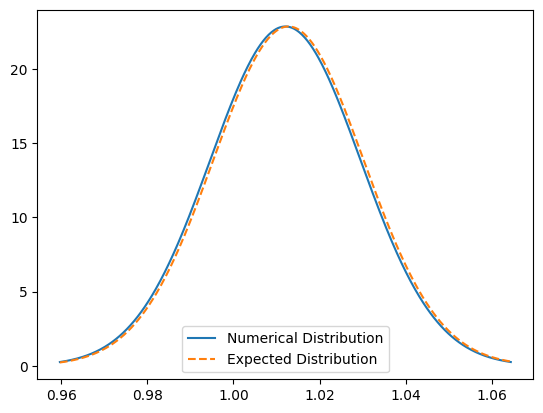

In [21]:
x=np.linspace(max_value-3*sigmamu_n,max_value+3*sigmamu_n, 500)
gauss_n=norm.pdf(x,max_value,sigmamu_n)
gauss=norm.pdf(x,mu_estimator,sigmamu)
plt.plot(x,gauss_n,label="Numerical Distribution")
plt.plot(x,gauss, label="Expected Distribution", ls='dashed')
plt.legend()